In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('fake_job_postings.xlsx')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,location.1
0,1,Marketing Intern,US,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15147 non-null  object
 8   benefits             10639 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                9
requirements            2733
benefits                7241
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
location.1               346
dtype: int64

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


In [8]:
df.drop('location', axis=1, inplace=True)

In [9]:
# kindly take note that locations was splited into just country codes.

In [10]:
df.columns

Index(['job_id', 'title', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'location.1'],
      dtype='object')

# Data Cleaning

<AxesSubplot:>

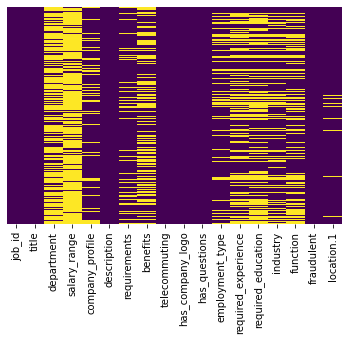

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.drop('company_profile', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)
df.drop('requirements', axis=1, inplace=True)
df.drop('benefits', axis=1, inplace=True)
df.drop('salary_range', axis=1, inplace=True) 
df.drop('department', axis=1, inplace=True)

In [13]:
# the above was dropped because it is not really relevant to what we are looking for.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   telecommuting        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   has_questions        17880 non-null  int64 
 4   employment_type      14409 non-null  object
 5   required_experience  10830 non-null  object
 6   required_education   9775 non-null   object
 7   industry             12977 non-null  object
 8   function             11425 non-null  object
 9   fraudulent           17880 non-null  int64 
 10  location.1           17534 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.5+ MB


In [15]:
df['employment_type'].fillna(method="backfill", inplace=True)
df['required_experience'].fillna(method="backfill", inplace=True)
df['location.1'].fillna(method="backfill", inplace=True)
df['required_education'].fillna(method="backfill", inplace=True)
df['industry'].fillna(method="backfill", inplace=True)
df['function'].fillna(method="backfill", inplace=True)

In [16]:
df.isnull().sum()

job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     1
industry               0
function               0
fraudulent             0
location.1             0
dtype: int64

In [17]:
df['required_education'].fillna(method="ffill", inplace=True)

In [18]:
df.isnull().sum()

job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
location.1             0
dtype: int64

<AxesSubplot:>

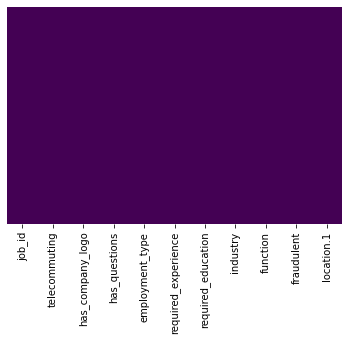

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
# from the above we can see that we have a very clean and workable data

# Exploratory Analysis and Visualization

In [21]:
df.sample(10)

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,location.1
2052,2053,0,1,1,Full-time,Mid-Senior level,Unspecified,Retail,Finance,0,FI
12798,12799,0,1,1,Full-time,Not Applicable,High School or equivalent,Insurance,Sales,0,US
5822,5823,0,1,1,Full-time,Not Applicable,Unspecified,Internet,Customer Service,0,DE
12833,12834,0,1,1,Other,Not Applicable,High School or equivalent,Design,Design,0,GR
4151,4152,0,0,0,Full-time,Associate,High School or equivalent,Information Technology and Services,Sales,0,GB
6161,6162,0,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Customer Service,0,PH
15380,15381,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Market Research,Management,0,US
16776,16777,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Real Estate,Customer Service,0,US
17822,17823,0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,1,GB
7655,7656,0,0,1,Contract,Entry level,Some High School Coursework,Education Management,Administrative,0,US


In [22]:
# no of fake Job postings
fake_job= df.fraudulent.value_counts()

In [23]:
fake_job

0    17014
1      866
Name: fraudulent, dtype: int64

In [24]:
# there are 866 fake job postings in the data set and can e represented graphically as shown below.

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='fraudulent'>

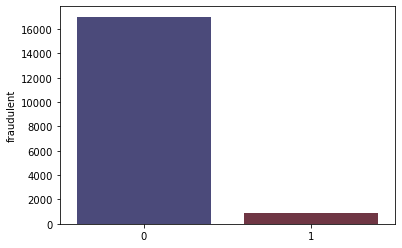

In [25]:
sns.barplot(fake_job.index, fake_job, palette='icefire')

In [26]:
fake_country = df.groupby('location.1')[['fraudulent']].sum

In [27]:
fake_country(10)

,fraudulent
location.1,
AE,1
AL,0
AM,0
AR,0
AT,0
...,...
US,742
VI,0
VN,0


In [28]:
industry_fake = df[df['location.1']=='US'].groupby(['industry'])[['fraudulent']].sum().sort_values('fraudulent', ascending=False).head(10)

In [29]:
industry_fake.head(10)

,fraudulent
industry,
Oil & Energy,116
Hospital & Health Care,69
Accounting,65
Marketing and Advertising,51
Information Technology and Services,47
Financial Services,44
Telecommunications,43
Consumer Services,31
Real Estate,29


In [30]:
# from the data set we have a high score of 116 fake job posting from the oil and energy industry

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'industry')

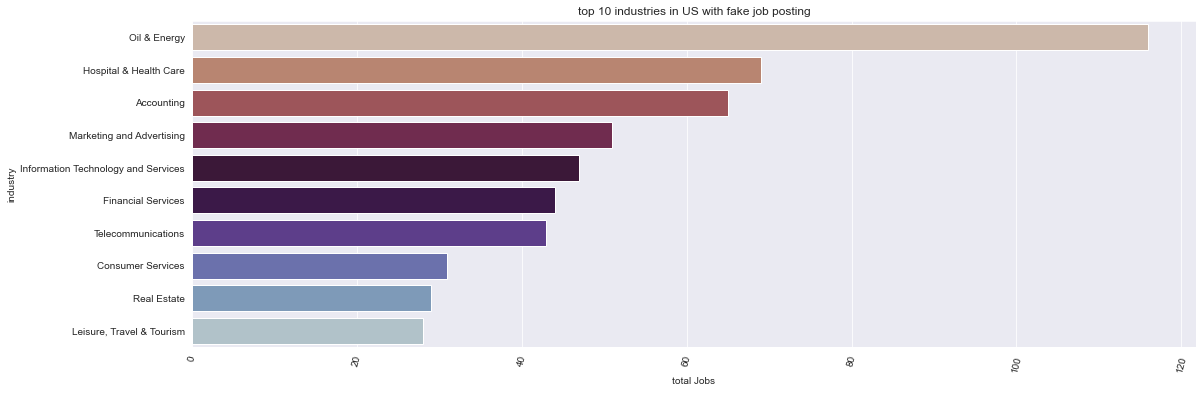

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.title('top 10 industries in US with fake job posting')
sns.barplot(industry_fake.fraudulent, industry_fake.index, palette='twilight_r')
plt.xlabel('total Jobs')
plt.ylabel('industry')

In [32]:
# above is the graphical representation of fake job posting by industry